In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [241]:
data_all = pd.read_csv('marketing_campaign.csv', sep = '\t')
data_all.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [242]:
data = data_all.loc[:, ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'MntWines',
                    'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179
std,11.984069,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000
75%,1977.000000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000
max,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000


Income has (2240-2216) = 24 empty cells. For this analysis, we will remove the rows with empty Income values.

In [243]:
data = data.dropna()
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993
std,11.985554,25173.076661,0.536896,0.544181,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000
75%,1977.000000,68522.000000,1.000000,1.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000
max,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000


Year of Birth: [ Max = 1996, Min = 1893, Avg = 1968 ]  
Income: [ Max = 666666, Min = 1730, Avg = 52247 ]  
Kids in home: [ Max = 2, Min = 0, Avg = 0.441 ]  
Teens in home: [ Max = 2, Min = 0, Avg = 0.505 ]  
Amount spent on Wines = [ Max = 1493, Min = 0, Avg = 305 ]  
Amount spent on fruits = [ Max = 199, Min = 0, Avg = 26 ]  
Amount spent on Meat = [ Max = 1725, Min = 0, Avg = 167 ]  
Amount spent on fish = [ Max = 259, Min = 0, Avg = 38 ]  
Amount spent on sweets = [ Max = 262, Min = 0, Avg = 27 ]  
Amount spend on gold = [ Max = 321, Min = 0, Avg = 44 ]  
Number of deals purchased = [ Max = 15, Min  =0, Avg = 2 ]  
Number of purchases from web = [ Max = 27, Min = 0, Avg = 4 ]  
Number of catalog purchases = [ Max = 28, Min = 0, Avg = 3 ]
Number of purchases from store = [ Max = 13, Min = 0, Avg = 6 ]

Questions of interest:  
1. How much percentage of income is spent on different products (eg. wine, fruits, gold etc.)?  
2. Is there any relation between age of a person and the food products he spends upon?  
3. Is there any relation between education level and income?  
4. IS there any relation between age of a person and his spending source (eg. store, website)?  
5. Group similar customerss

In [244]:
def get_percentage_spendings(product_name):
  new_column_name = product_name[3:].lower() + '%'
  data[new_column_name] = data[product_name]/data['Income']*100
get_percentage_spendings('MntWines')
get_percentage_spendings('MntFruits')
get_percentage_spendings('MntMeatProducts')
get_percentage_spendings('MntFishProducts')
get_percentage_spendings('MntSweetProducts')
get_percentage_spendings('MntGoldProds')
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,wines%,fruits%,meatproducts%,fishproducts%,sweetproducts%,goldprods%
0,1957,Graduation,Single,58138.0,0,0,635,88,546,172,...,3,8,10,4,1.092229,0.151364,0.939145,0.295848,0.151364,0.151364
1,1954,Graduation,Single,46344.0,1,1,11,1,6,2,...,2,1,1,2,0.023736,0.002158,0.012947,0.004316,0.002158,0.012947
2,1965,Graduation,Together,71613.0,0,0,426,49,127,111,...,1,8,2,10,0.594864,0.068423,0.177342,0.155000,0.029324,0.058649
3,1984,Graduation,Together,26646.0,1,0,11,4,20,10,...,2,2,0,4,0.041282,0.015012,0.075058,0.037529,0.011259,0.018765
4,1981,PhD,Married,58293.0,1,0,173,43,118,46,...,5,5,3,6,0.296777,0.073765,0.202426,0.078912,0.046318,0.025732


In [245]:
data['age'] = 2025 - data['Year_Birth']
age_food_products_columns = []
for column in data.columns:
  if column[-1] == '%':
    age_food_products_columns.append(column)
age_food_products_columns.insert(0, 'age')
data.loc[:, age_food_products_columns].corr()

,age,wines%,fruits%,meatproducts%,fishproducts%,sweetproducts%,goldprods%
age,1.000000,0.176021,-0.036306,-0.012527,0.002176,-0.028830,-0.013878
wines%,0.176021,1.000000,0.224270,0.070468,0.231854,0.228141,0.112704
fruits%,-0.036306,0.224270,1.000000,0.084812,0.547568,0.512617,0.167975
meatproducts%,-0.012527,0.070468,0.084812,1.000000,0.086616,0.084369,0.015322
fishproducts%,0.002176,0.231854,0.547568,0.086616,1.000000,0.550833,0.136539
sweetproducts%,-0.028830,0.228141,0.512617,0.084369,0.550833,1.000000,0.141837
goldprods%,-0.013878,0.112704,0.167975,0.015322,0.136539,0.141837,1.000000


Age has 17% correlation with wine. Other than that there is no significant correlation between age and other products.  
*Note: There is higher correlation between (fruits and fish consumption), (fruits and sweets consumption), (fish and sweets consumption)

In [246]:
education_map = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}
data['edu_map'] = data['Education'].map(education_map)
data.loc[:, ['edu_map', 'Income']].corr()

,edu_map,Income
edu_map,1.000000,0.149338
Income,0.149338,1.000000


There is 14% correlation between education level with income

In [247]:
age_spending_sources_columns = []
for column in data.columns:
  if column[-9:] == 'Purchases':
    age_spending_sources_columns.append(column)
age_spending_sources_columns.insert(0, 'age')
data.loc[:, age_spending_sources_columns].corr()

,age,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
age,1.000000,0.058668,0.153051,0.121764,0.127891
NumDealsPurchases,0.058668,1.000000,0.241440,-0.012118,0.066107
NumWebPurchases,0.153051,0.241440,1.000000,0.386868,0.516240
NumCatalogPurchases,0.121764,-0.012118,0.386868,1.000000,0.517840
NumStorePurchases,0.127891,0.066107,0.516240,0.517840,1.000000


Correlation between Age and spendings on deals = 6%  
Correlation between Age and spendings at websites = 15%  
Correlation between Age and spendings on catalogs = 12%  
Correlation between Age and spendings at stores = 13%

In [248]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'wines%', 'fruits%', 'meatproducts%',
       'fishproducts%', 'sweetproducts%', 'goldprods%', 'age', 'edu_map'],
      dtype='object')

In [249]:
data.loc[data['Marital_Status'] == 'Together', 'Marital_Status'] = 'Couple'
data.loc[data['Marital_Status'] == 'Married', 'Marital_Status'] = 'Couple'
data.loc[data['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Absurd', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'YOLO', 'Marital_Status'] = 'Single'
data['Marital_Status'] = data['Marital_Status'].astype('category')
print(data['Marital_Status'].unique())
marital_encoded = pd.get_dummies(data['Marital_Status'])
print(marital_encoded)
data = pd.concat([data, marital_encoded], axis = 1)
data.head()

['Single', 'Couple', 'Divorced', 'Widow']
Categories (4, object): ['Couple', 'Divorced', 'Single', 'Widow']
      Couple  Divorced  Single  Widow
0      False     False    True  False
1      False     False    True  False
2       True     False   False  False
3       True     False   False  False
4       True     False   False  False
...      ...       ...     ...    ...
2235    True     False   False  False
2236    True     False   False  False
2237   False      True   False  False
2238    True     False   False  False
2239    True     False   False  False

[2216 rows x 4 columns]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,meatproducts%,fishproducts%,sweetproducts%,goldprods%,age,edu_map,Couple,Divorced,Single,Widow
0,1957,Graduation,Single,58138.0,0,0,635,88,546,172,...,0.939145,0.295848,0.151364,0.151364,68,3,False,False,True,False
1,1954,Graduation,Single,46344.0,1,1,11,1,6,2,...,0.012947,0.004316,0.002158,0.012947,71,3,False,False,True,False
2,1965,Graduation,Couple,71613.0,0,0,426,49,127,111,...,0.177342,0.155000,0.029324,0.058649,60,3,True,False,False,False
3,1984,Graduation,Couple,26646.0,1,0,11,4,20,10,...,0.075058,0.037529,0.011259,0.018765,41,3,True,False,False,False
4,1981,PhD,Couple,58293.0,1,0,173,43,118,46,...,0.202426,0.078912,0.046318,0.025732,44,5,True,False,False,False


In [250]:
data['children'] = data['Kidhome'] + data['Teenhome']
data[['Single', 'Couple', 'Divorced', 'Widow']] = data[['Single', 'Couple', 'Divorced', 'Widow']].astype(int)
scaler = StandardScaler()
data[['age', 'Income']] = scaler.fit_transform(data[['age', 'Income']])

In [251]:
filtered_columns = ['age', 'edu_map', 'Single', 'Couple', 'Divorced', 'Widow', 'children', 'Income', 'wines%', 'fruits%', 'meatproducts%', 'fishproducts%', 'sweetproducts%',
                    'goldprods%']
filtered_data = data.loc[:, filtered_columns]
print(filtered_data.isnull().any())
filtered_data.head()

age               False
edu_map           False
Single            False
Couple            False
Divorced          False
Widow             False
children          False
Income            False
wines%            False
fruits%           False
meatproducts%     False
fishproducts%     False
sweetproducts%    False
goldprods%        False
dtype: bool


,age,edu_map,Single,Couple,Divorced,Widow,children,Income,wines%,fruits%,meatproducts%,fishproducts%,sweetproducts%,goldprods%
0,0.986443,3,1,0,0,0,0,0.234063,1.092229,0.151364,0.939145,0.295848,0.151364,0.151364
1,1.236801,3,1,0,0,0,2,-0.234559,0.023736,0.002158,0.012947,0.004316,0.002158,0.012947
2,0.318822,3,0,1,0,0,0,0.769478,0.594864,0.068423,0.177342,0.155000,0.029324,0.058649
3,-1.266777,3,0,1,0,0,1,-1.017239,0.041282,0.015012,0.075058,0.037529,0.011259,0.018765
4,-1.016420,5,0,1,0,0,1,0.240221,0.296777,0.073765,0.202426,0.078912,0.046318,0.025732


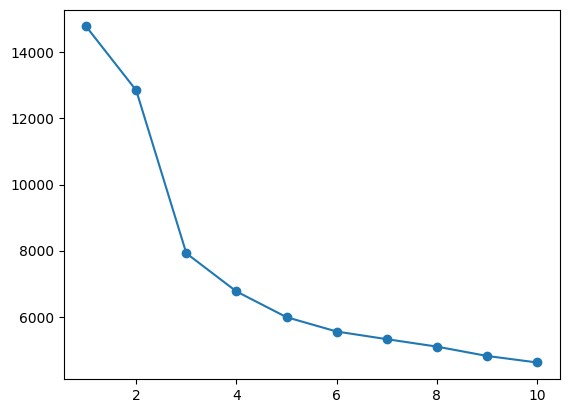

In [252]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(filtered_data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')

Optimum number of clusters is 4

In [253]:
kmeans_train = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
output = kmeans_train.fit_predict(filtered_data)
filtered_data = pd.concat([filtered_data, pd.DataFrame(output, columns = ['cluster'], index = filtered_data.index)], axis = 1)
filtered_data.head()

,age,edu_map,Single,Couple,Divorced,Widow,children,Income,wines%,fruits%,meatproducts%,fishproducts%,sweetproducts%,goldprods%,cluster
0,0.986443,3,1,0,0,0,0,0.234063,1.092229,0.151364,0.939145,0.295848,0.151364,0.151364,0
1,1.236801,3,1,0,0,0,2,-0.234559,0.023736,0.002158,0.012947,0.004316,0.002158,0.012947,1
2,0.318822,3,0,1,0,0,0,0.769478,0.594864,0.068423,0.177342,0.155000,0.029324,0.058649,0
3,-1.266777,3,0,1,0,0,1,-1.017239,0.041282,0.015012,0.075058,0.037529,0.011259,0.018765,3
4,-1.016420,5,0,1,0,0,1,0.240221,0.296777,0.073765,0.202426,0.078912,0.046318,0.025732,1


In [254]:
pca = PCA(n_components = 2)
filtered_data_pca = pca.fit_transform(filtered_data)

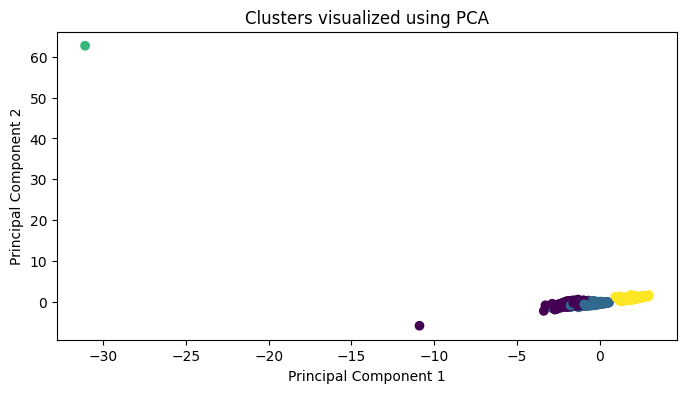

In [255]:
fig = plt.figure(figsize=(8,4))
plt.scatter(filtered_data_pca[:, 0], filtered_data_pca[:, 1], c = output, cmap = 'viridis')
plt.title("Clusters visualized using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

There are outliers in the data. We will find them and remove them.

In [256]:
# silhouette_score = silhouette_score(filtered_data, output)
# print(f"Silhouette Score: {silhouette_score}")

Silhouette Score: 0.31799952805635784
